
MODELO: AR(1)

Componente AR(1):
Coeficientes φ: [0.9]
Polinomio característico: 1 - 0.900z = 0

Raíces del polinomio AR:
  z_1 = 1.1111, |z_1| = 1.1111

✓ ESTACIONARIEDAD: SÍ (todas las raíces |z| > 1)

No hay componente MA - Proceso AR puro (siempre invertible)

MODELO: AR(2)

Componente AR(2):
Coeficientes φ: [0.5, -0.3]
Polinomio característico: 1 - 0.500z + 0.300z^2 = 0

Raíces del polinomio AR:
  z_1 = 0.8333 + 1.6245i, |z_1| = 1.8257
  z_2 = 0.8333 + -1.6245i, |z_2| = 1.8257

✓ ESTACIONARIEDAD: SÍ (todas las raíces |z| > 1)

No hay componente MA - Proceso AR puro (siempre invertible)

MODELO: MA(1)

No hay componente AR - Proceso MA puro (siempre estacionario)

Componente MA(1):
Coeficientes θ: [0.7]
Polinomio MA: 1 + 0.700z = 0

Raíces del polinomio MA:
  z_1 = -1.4286, |z_1| = 1.4286

✓ INVERTIBILIDAD: SÍ (todas las raíces |z| > 1)

MODELO: MA(2)

No hay componente AR - Proceso MA puro (siempre estacionario)

Componente MA(2):
Coeficientes θ: [0.4, 0.2]
Polinomio MA: 1 + 0.40

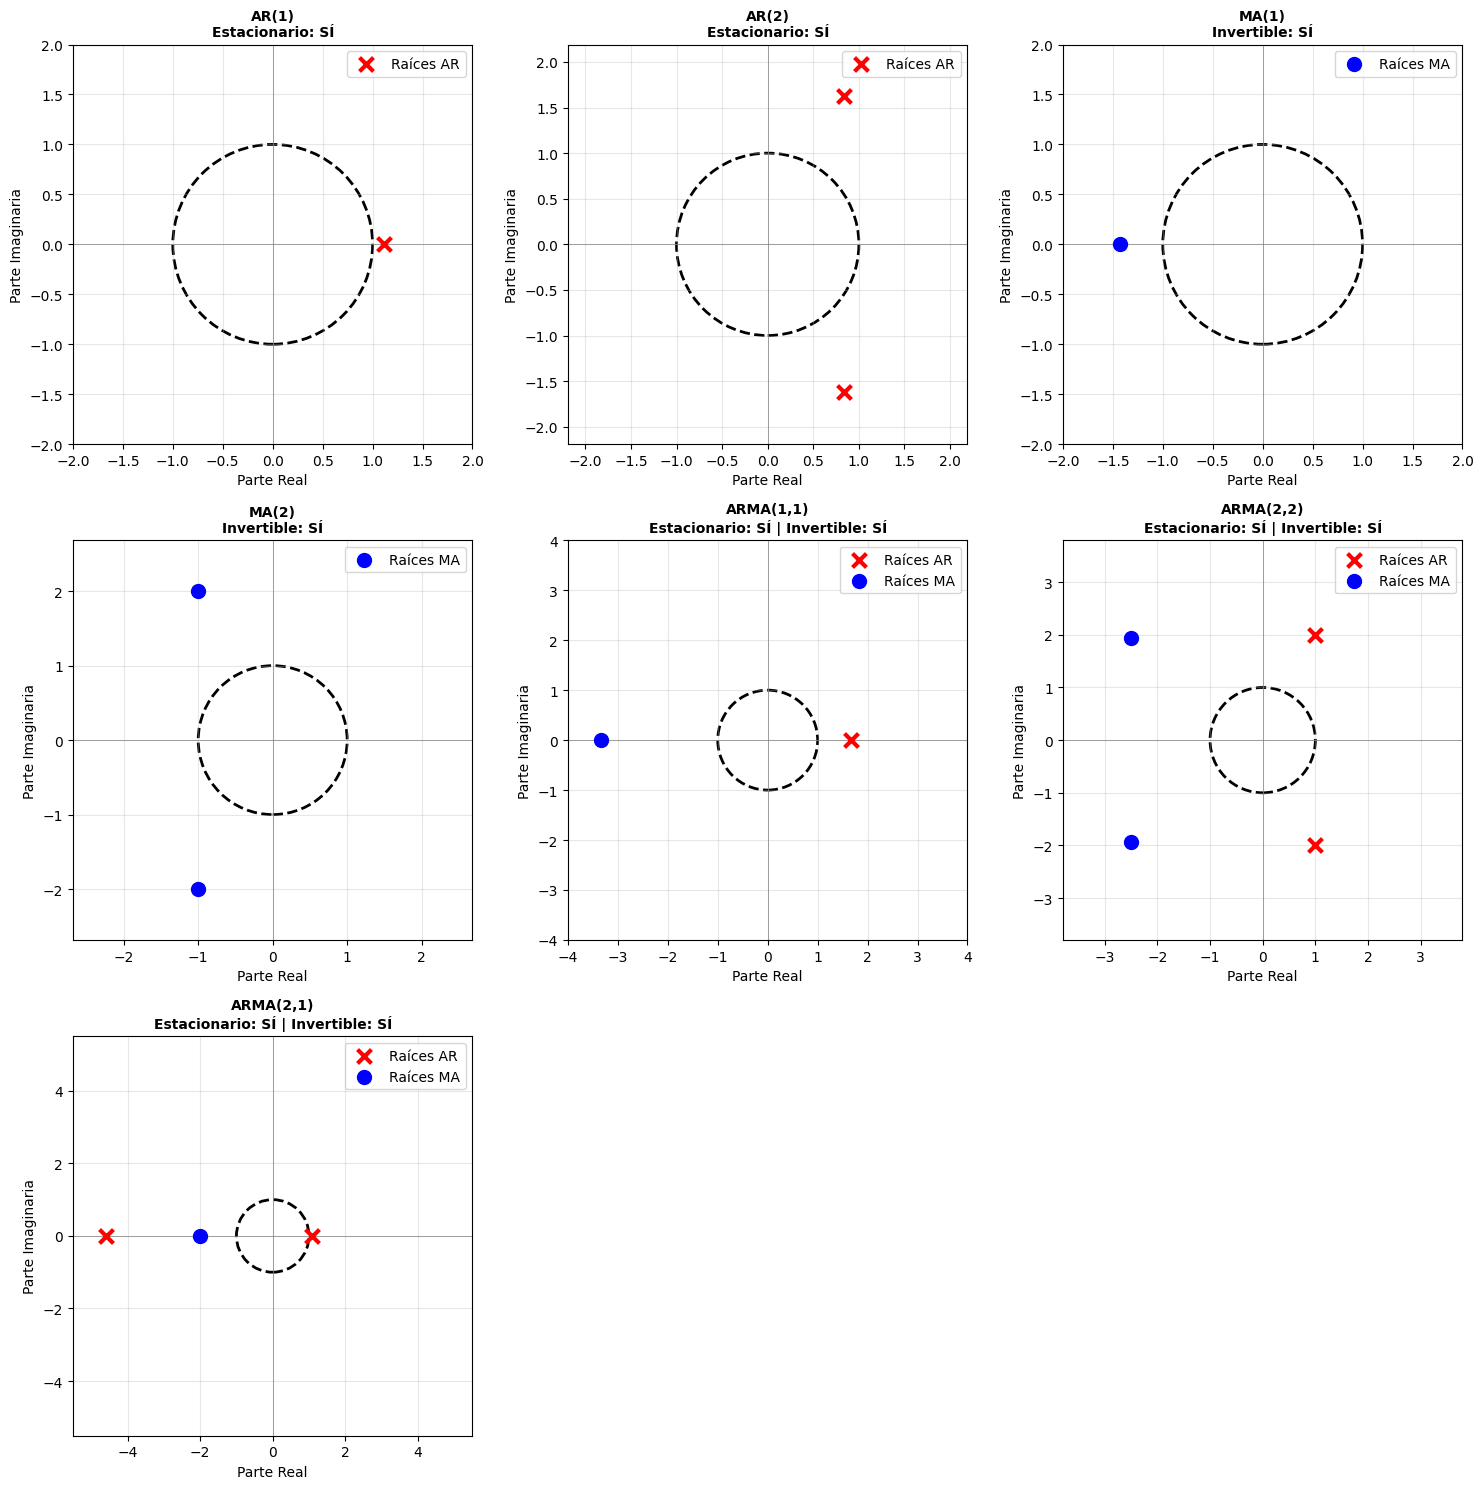

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def verificar_estacionariedad_arma(phi, theta, nombre_modelo):
    """
    Verifica la estacionariedad de un proceso ARMA mediante el análisis del polinomio característico.
    
    Parámetros:
    -----------
    phi : list o None
        Coeficientes AR (φ). None si no hay componente AR.
    theta : list o None
        Coeficientes MA (θ). None si no hay componente MA.
    nombre_modelo : str
        Nombre descriptivo del modelo.
    
    Retorna:
    --------
    dict con información sobre la estacionariedad e invertibilidad
    """
    resultado = {
        'modelo': nombre_modelo,
        'es_estacionario': None,
        'es_invertible': None,
        'raices_ar': None,
        'raices_ma': None,
        'polinomio_ar': None,
        'polinomio_ma': None
    }
    
    print(f"\n{'='*60}")
    print(f"MODELO: {nombre_modelo}")
    print(f"{'='*60}")
    
    # Análisis del componente AR (estacionariedad)
    if phi is not None and len(phi) > 0:
        # Polinomio característico: 1 - φ₁z - φ₂z² - ... = 0
        # Para encontrar raíces, reordenamos: φ₁z + φ₂z² + ... = 1
        # O multiplicamos por -1 y movemos el 1: -1 + φ₁z + φ₂z² + ... = 0
        # np.roots necesita coeficientes de mayor a menor grado
        # Invertimos: [..., φ₂, φ₁, -1] para grado descendente
        coef_ar = np.concatenate((np.array(phi)[::-1], [-1]))
        resultado['polinomio_ar'] = coef_ar
        
        print(f"\nComponente AR({len(phi)}):")
        print(f"Coeficientes φ: {phi}")
        print(f"Polinomio característico: 1", end="")
        for i, p in enumerate(phi, 1):
            signo = "-" if p >= 0 else "+"
            coef = abs(p)
            if i == 1:
                print(f" {signo} {coef:.3f}z", end="")
            else:
                print(f" {signo} {coef:.3f}z^{i}", end="")
        print(" = 0")
        
        # Calcular raíces
        raices_ar = np.roots(coef_ar)
        resultado['raices_ar'] = raices_ar
        
        print(f"\nRaíces del polinomio AR:")
        for i, raiz in enumerate(raices_ar, 1):
            modulo = np.abs(raiz)
            if np.isreal(raiz):
                print(f"  z_{i} = {raiz.real:.4f}, |z_{i}| = {modulo:.4f}")
            else:
                print(f"  z_{i} = {raiz.real:.4f} + {raiz.imag:.4f}i, |z_{i}| = {modulo:.4f}")
        
        # Verificar estacionariedad: todas las raíces deben estar fuera del círculo unitario
        modulos_ar = np.abs(raices_ar)
        es_estacionario = np.all(modulos_ar > 1.0)
        resultado['es_estacionario'] = es_estacionario
        
        print(f"\n{'✓' if es_estacionario else '✗'} ESTACIONARIEDAD: ", end="")
        if es_estacionario:
            print(f"SÍ (todas las raíces |z| > 1)")
        else:
            raices_problema = modulos_ar <= 1.0
            print(f"NO (raíces con |z| ≤ 1: {np.sum(raices_problema)})")
    else:
        print("\nNo hay componente AR - Proceso MA puro (siempre estacionario)")
        resultado['es_estacionario'] = True
    
    # Análisis del componente MA (invertibilidad)
    if theta is not None and len(theta) > 0:
        # Polinomio MA: 1 + θ₁z + θ₂z² + ... = 0
        # np.roots necesita coeficientes de mayor a menor grado
        # [..., θ₂, θ₁, 1] para grado descendente
        coef_ma = np.concatenate((np.array(theta)[::-1], [1]))
        resultado['polinomio_ma'] = coef_ma
        
        print(f"\nComponente MA({len(theta)}):")
        print(f"Coeficientes θ: {theta}")
        print(f"Polinomio MA: 1", end="")
        for i, t in enumerate(theta, 1):
            signo = "+" if t >= 0 else "-"
            coef = abs(t)
            if i == 1:
                print(f" {signo} {coef:.3f}z", end="")
            else:
                print(f" {signo} {coef:.3f}z^{i}", end="")
        print(" = 0")
        
        # Calcular raíces
        raices_ma = np.roots(coef_ma)
        resultado['raices_ma'] = raices_ma
        
        print(f"\nRaíces del polinomio MA:")
        for i, raiz in enumerate(raices_ma, 1):
            modulo = np.abs(raiz)
            if np.isreal(raiz):
                print(f"  z_{i} = {raiz.real:.4f}, |z_{i}| = {modulo:.4f}")
            else:
                print(f"  z_{i} = {raiz.real:.4f} + {raiz.imag:.4f}i, |z_{i}| = {modulo:.4f}")
        
        # Verificar invertibilidad: todas las raíces deben estar fuera del círculo unitario
        modulos_ma = np.abs(raices_ma)
        es_invertible = np.all(modulos_ma > 1.0)
        resultado['es_invertible'] = es_invertible
        
        print(f"\n{'✓' if es_invertible else '✗'} INVERTIBILIDAD: ", end="")
        if es_invertible:
            print(f"SÍ (todas las raíces |z| > 1)")
        else:
            raices_problema = modulos_ma <= 1.0
            print(f"NO (raíces con |z| ≤ 1: {np.sum(raices_problema)})")
    else:
        print("\nNo hay componente MA - Proceso AR puro (siempre invertible)")
        resultado['es_invertible'] = True
    
    return resultado

def graficar_raices(resultados):
    """
    Grafica las raíces de los polinomios característicos en el plano complejo.
    """
    n_modelos = len(resultados)
    n_cols = 3
    n_rows = (n_modelos + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_modelos > 1 else [axes]
    
    for idx, res in enumerate(resultados):
        ax = axes[idx]
        
        # Dibujar círculo unitario
        circulo = Circle((0, 0), 1, fill=False, color='black', linestyle='--', linewidth=2)
        ax.add_patch(circulo)
        
        # Graficar raíces AR (estacionariedad)
        if res['raices_ar'] is not None:
            raices = res['raices_ar']
            ax.scatter(raices.real, raices.imag, s=100, c='red', marker='x', 
                      linewidths=3, label='Raíces AR', zorder=5)
            
            # Marcar raíces problemáticas
            modulos = np.abs(raices)
            raices_dentro = modulos <= 1.0
            if np.any(raices_dentro):
                ax.scatter(raices[raices_dentro].real, raices[raices_dentro].imag, 
                          s=200, facecolors='none', edgecolors='red', linewidths=3, zorder=4)
        
        # Graficar raíces MA (invertibilidad)
        if res['raices_ma'] is not None:
            raices = res['raices_ma']
            ax.scatter(raices.real, raices.imag, s=100, c='blue', marker='o', 
                      label='Raíces MA', zorder=5)
            
            # Marcar raíces problemáticas
            modulos = np.abs(raices)
            raices_dentro = modulos <= 1.0
            if np.any(raices_dentro):
                ax.scatter(raices[raices_dentro].real, raices[raices_dentro].imag, 
                          s=200, facecolors='none', edgecolors='blue', linewidths=3, zorder=4)
        
        ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
        ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
        ax.grid(True, alpha=0.3)
        ax.set_aspect('equal')
        
        # Ajustar límites
        limite = max(2, np.max([np.max(np.abs(res['raices_ar'])) if res['raices_ar'] is not None else 0,
                                np.max(np.abs(res['raices_ma'])) if res['raices_ma'] is not None else 0]) * 1.2)
        ax.set_xlim(-limite, limite)
        ax.set_ylim(-limite, limite)
        
        ax.set_xlabel('Parte Real')
        ax.set_ylabel('Parte Imaginaria')
        
        # Título con información de estacionariedad
        titulo = f"{res['modelo']}\n"
        if res['raices_ar'] is not None:
            titulo += f"Estacionario: {'SÍ' if res['es_estacionario'] else 'NO'}"
        if res['raices_ma'] is not None:
            if res['raices_ar'] is not None:
                titulo += " | "
            titulo += f"Invertible: {'SÍ' if res['es_invertible'] else 'NO'}"
        ax.set_title(titulo, fontsize=10, fontweight='bold')
        
        ax.legend(loc='upper right')
    
    # Ocultar ejes sobrantes
    for idx in range(n_modelos, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Definir los modelos
modelos = [
    {'nombre': 'AR(1)', 'phi': [0.9], 'theta': None},
    {'nombre': 'AR(2)', 'phi': [0.5, -0.3], 'theta': None},
    {'nombre': 'MA(1)', 'phi': None, 'theta': [0.7]},
    {'nombre': 'MA(2)', 'phi': None, 'theta': [0.4, 0.2]},
    {'nombre': 'ARMA(1,1)', 'phi': [0.6], 'theta': [0.3]},
    {'nombre': 'ARMA(2,2)', 'phi': [0.4, -0.2], 'theta': [0.5, 0.1]},
    {'nombre': 'ARMA(2,1)', 'phi': [0.7, 0.2], 'theta': [0.5]},  # Modelo adicional
]

# Analizar todos los modelos
resultados = []
for modelo in modelos:
    res = verificar_estacionariedad_arma(
        phi=modelo['phi'],
        theta=modelo['theta'],
        nombre_modelo=modelo['nombre']
    )
    resultados.append(res)

# Resumen final
print(f"\n{'='*60}")
print("RESUMEN DE ESTACIONARIEDAD E INVERTIBILIDAD")
print(f"{'='*60}")
print(f"{'Modelo':<15} {'Estacionario':<15} {'Invertible':<15}")
print("-" * 45)
for res in resultados:
    est = 'SÍ ✓' if res['es_estacionario'] else 'NO ✗'
    inv = 'SÍ ✓' if res['es_invertible'] else 'NO ✗'
    if res['raices_ar'] is None:
        est = 'N/A (MA puro)'
    if res['raices_ma'] is None:
        inv = 'N/A (AR puro)'
    print(f"{res['modelo']:<15} {est:<15} {inv:<15}")

# Graficar las raíces
graficar_raices(resultados)